In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, _), (_, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0

In [ ]:
latent_dim = 100

In [ ]:
# Define generator
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(512),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(784, activation='sigmoid'),  # Output layer with 28*28=784 neurons
    Reshape((28, 28, 1))  # Reshape to the size of the images in Fashion-MNIST
])

In [ ]:
# Define discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the input image
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

In [ ]:
# Define GAN model
discriminator.trainable = False  # This freezes the discriminator during GAN training
gan_input = Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = Model(gan_input, gan_output)

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

In [ ]:
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

In [ ]:
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)

    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, labels_gan)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
Epoch 100/5000 [D loss: 4.072130441665649 | D accuracy: 0.0] [G loss: 0.0008940777624957263]
2/2 [==============================] - 0s 8ms/step
Epoch 200/5000 [D loss: 4.250926852226257 | D accuracy: 3.125] [G loss: 0.0007506514666602015]
2/2 [==============================] - 0s 7ms/step
Epoch 300/5000 [D loss: 4.194390952587128 | D accuracy: 0.78125] [G loss: 0.0007255015661939979]
2/2 [==============================] - 0s 13ms/step
Epoch 400/5000 [D loss: 4.246995985507965 | D accuracy: 0.78125] [G loss: 0.0007142891408875585]
2/2 [==============================] - 0s 10ms/step
Epoch 500/5000 [D loss: 4.415814757347107 | D accuracy: 0.0] [G loss: 0.0006625805399380624]
2/2 [==============================] - 0s 8ms/step
Epoch 600/5000 [D loss: 4.290494918823242 | D accuracy: 0.78125] [G loss: 0.0006247099954634905]
2/2 [==============================] - 0s 7ms/step
Epoch 700/5000 [D 

1/1 [==============================] - 0s 127ms/step


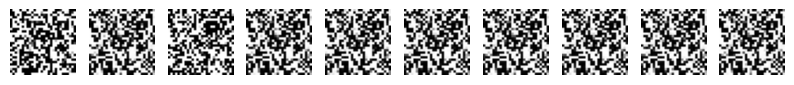

In [ ]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))
generated_images = generator.predict(random_latent_vectors)

fig, axes = plt.subplots(1, num_samples, figsize=(num_samples, 1))
for i in range(num_samples):
    axes[i].imshow(generated_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.show()